# Mean squared distribution 

200 Agents per simulation
Griddimensions : 100x100 , 300x300, 1000x1000 each 50 times

In [10]:
using DataFrames
using CSV
using CairoMakie
using Statistics

In [14]:
# Reading CSV as DataFrame
MSDS= DataFrame(CSV.File("MSDS_ensemble_100_300_1k_a50runs.csv"))

,Step,ens_1,ens_2,ens_3,ens_4,ens_5,ens_6,ens_7,ens_8,ens_9
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.05225,1.08569,1.13918,1.01447,1.08069,1.04397,1.02018,1.06175,1.08347
3,2,1.38558,1.27865,1.50059,1.40915,1.35278,1.40936,1.42033,1.437,1.45502
4,3,1.73565,1.6703,1.81558,1.72886,1.6538,1.83555,1.71958,1.75417,1.78015
5,4,2.03959,1.98124,2.12568,1.96042,1.86813,2.0928,1.96287,2.00997,1.99015
6,5,2.27295,2.2012,2.28058,2.19704,2.13676,2.22083,2.23515,2.19347,2.27684
7,6,2.53722,2.48798,2.48813,2.36873,2.31808,2.42574,2.41003,2.42149,2.46836
8,7,2.74275,2.62371,2.68036,2.61233,2.51324,2.70801,2.63662,2.62376,2.71643
9,8,2.99393,2.88771,2.86659,2.69368,2.69446,2.96071,2.86115,2.72648,2.86708


In [15]:
# Data Preparation:
MSDS = MSDS[setdiff(1:end, 1), :]#delete 0 timestep before plotting since log(0) not defined.
MSDS = MSDS[:,setdiff(1:end, 1) ]# delete first colum ":Step"

,ens_1,ens_2,ens_3,ens_4,ens_5,ens_6,ens_7,ens_8,ens_9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.05225,1.08569,1.13918,1.01447,1.08069,1.04397,1.02018,1.06175,1.08347
2,1.38558,1.27865,1.50059,1.40915,1.35278,1.40936,1.42033,1.437,1.45502
3,1.73565,1.6703,1.81558,1.72886,1.6538,1.83555,1.71958,1.75417,1.78015
4,2.03959,1.98124,2.12568,1.96042,1.86813,2.0928,1.96287,2.00997,1.99015
5,2.27295,2.2012,2.28058,2.19704,2.13676,2.22083,2.23515,2.19347,2.27684
6,2.53722,2.48798,2.48813,2.36873,2.31808,2.42574,2.41003,2.42149,2.46836
7,2.74275,2.62371,2.68036,2.61233,2.51324,2.70801,2.63662,2.62376,2.71643
8,2.99393,2.88771,2.86659,2.69368,2.69446,2.96071,2.86115,2.72648,2.86708
9,3.1723,2.99565,3.00599,2.91842,2.94875,3.13912,2.97165,2.91953,3.14328


In [16]:
# Add the gridsizes to the columnnames
rename!(MSDS,names(MSDS).* "_" .*repeat(["100", "300", "1000"], 50))

# split into 3 dataframes for each gridsize 
MSDS_100=MSDS[:, Not(r"1000|300")]
MSDS_300=MSDS[:, r"300"]
MSDS_1000=MSDS[:, r"1000"]

,ens_3_1000,ens_6_1000,ens_9_1000,ens_12_1000,ens_15_1000,ens_18_1000,ens_21_1000
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.13918,1.04397,1.08347,1.04447,1.11018,1.09554,1.05225
2,1.50059,1.40936,1.45502,1.43915,1.4163,1.42336,1.39926
3,1.81558,1.83555,1.78015,1.82293,1.83178,1.78868,1.79833
4,2.12568,2.0928,1.99015,2.19045,2.12731,2.03048,2.08717
5,2.28058,2.22083,2.27684,2.45235,2.38102,2.32586,2.16056
6,2.48813,2.42574,2.46836,2.64905,2.64563,2.60214,2.41438
7,2.68036,2.70801,2.71643,2.74177,2.85216,2.79366,2.61877
8,2.86659,2.96071,2.86708,2.96607,3.06496,2.9845,2.80925
9,3.00599,3.13912,3.14328,3.01841,3.32549,3.12016,2.93947


In [61]:
f = Figure()
Axis(f[1, 1],yscale=log10,xscale=log10, title="Random Walk ABM, 200 Agents, 100,300,1000 gridsize Mean square displacement",
    xlabel = "lag time τ ", ylabel = "MSD r²τ")
lines!.(eachcol(MSDS_100),color="black")
lines!.(eachcol(MSDS_300),color="red")
lines!.(eachcol(MSDS_1000),color="green")

50-element Vector{Lines{Tuple{Vector{Point{2, Float32}}}}}:
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 ⋮
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float32}}}}
 Lines{Tuple{Vector{Point{2, Float3

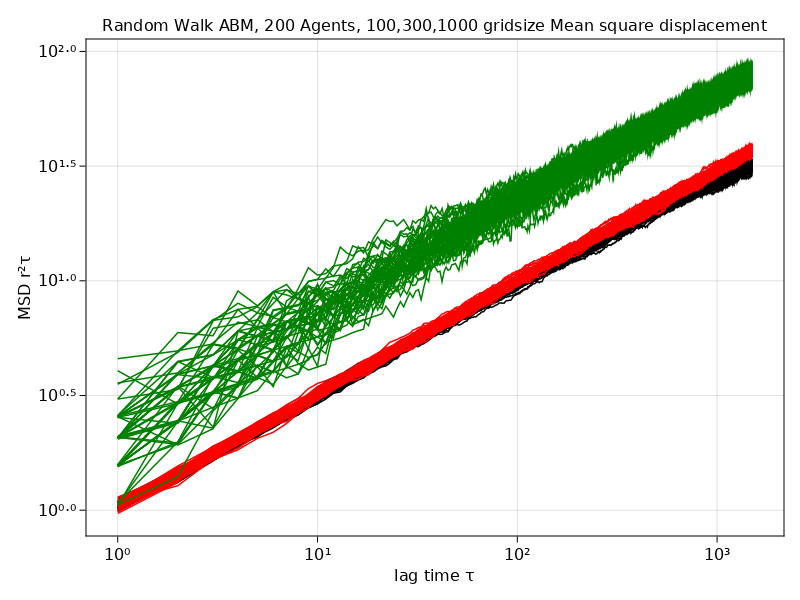

In [62]:
f

In [56]:

# calculate mean & standart deviation at each timestep

f_mean = Figure()
Axis(f_mean[1, 1],yscale=log10,xscale=log10, title="Random Walk ABM, 200 Agents, 100,300,1000 gridsize Mean square displacement",
    xlabel = "lag time τ ", ylabel = "MSD r²τ")
    errorbars!(1:nrow(MSDS_100),mean.(eachrow(MSDS_100)),std.(eachrow(MSDS_100)),color="grey")
    errorbars!(1:nrow(MSDS_100),mean.(eachrow(MSDS_300)),std.(eachrow(MSDS_300)),color="red2")
    errorbars!(1:nrow(MSDS_100),mean.(eachrow(MSDS_1000)),std.(eachrow(MSDS_1000)),color="green2")
    lines!(mean.(eachrow(MSDS_100)),color="black")
    lines!(mean.(eachrow(MSDS_300)),color="red")
    lines!(mean.(eachrow(MSDS_1000)),color="green")

Lines{Tuple{Vector{Point{2, Float32}}}}

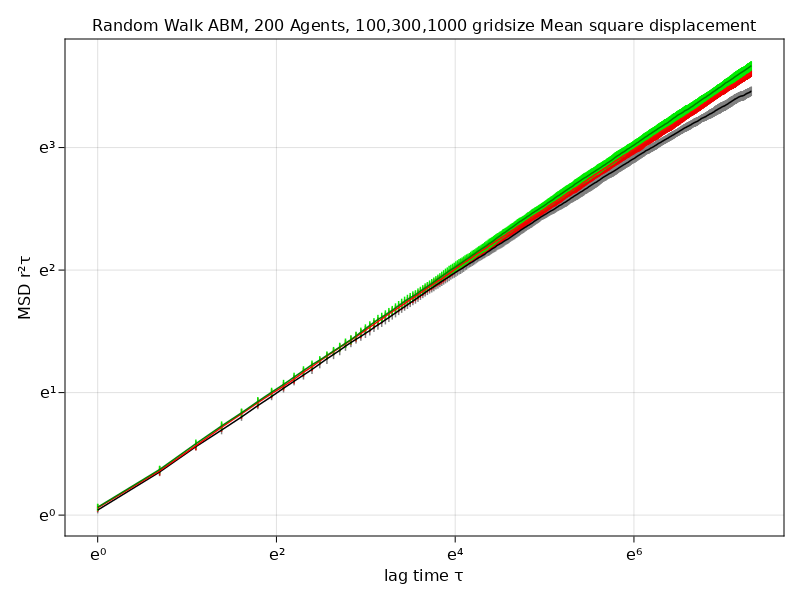

In [59]:
f_mean

### Mean squared distribution periodic

 - 1000 Agents per simulation 
 - Griddimensions : 100x100 , 300x300, 500x500 
 - each 50 times

In [11]:

# Reading CSV as DataFrame
MSDS= DataFrame(CSV.File("MSDS_Periodic_ensemble_100_300_500_1kagents_a50runs.csv"))

# Data Preparation:
MSDS = MSDS[setdiff(1:end, 1), :]#delete 0 timestep before plotting since log(0) not defined.
MSDS = MSDS[:,setdiff(1:end, 1) ]# delete first colum ":Step"

# Add the gridsizes to the columnnames
rename!(MSDS,names(MSDS).* "_" .*repeat(["100", "300", "500"], 50))
# for individual plotting of eachgroup
MSDS_100=MSDS[:, r"100"]
MSDS_300=MSDS[:, r"300"]
MSDS_500=MSDS[:, r"500"]

f = Figure()
Axis(f[1, 1],yscale=log10,xscale=log10, title="Random Walk ABM, 1000 Agents, 100 300 500 gridsize periodic square displacement",
    xlabel = "lag time τ ", ylabel = "MSD r²τ")
lines!.(eachcol(MSDS_100),color="black")
lines!.(eachcol(MSDS_300),color="red")
lines!.(eachcol(MSDS_500),color="green")



f_mean = Figure()
Axis(f_mean[1, 1],yscale=log10,xscale=log10, title="Random Walk ABM, 1000 Agents, 100 300 500 gridsize periodic square displacement",
    xlabel = "lag time τ ", ylabel = "MSD r²τ")
lines!(mean.(eachrow(MSDS_100)),color="black")
lines!(mean.(eachrow(MSDS_300)),color="red")
lines!(mean.(eachrow(MSDS_500)),color="green")



Lines{Tuple{Vector{Point{2, Float32}}}}

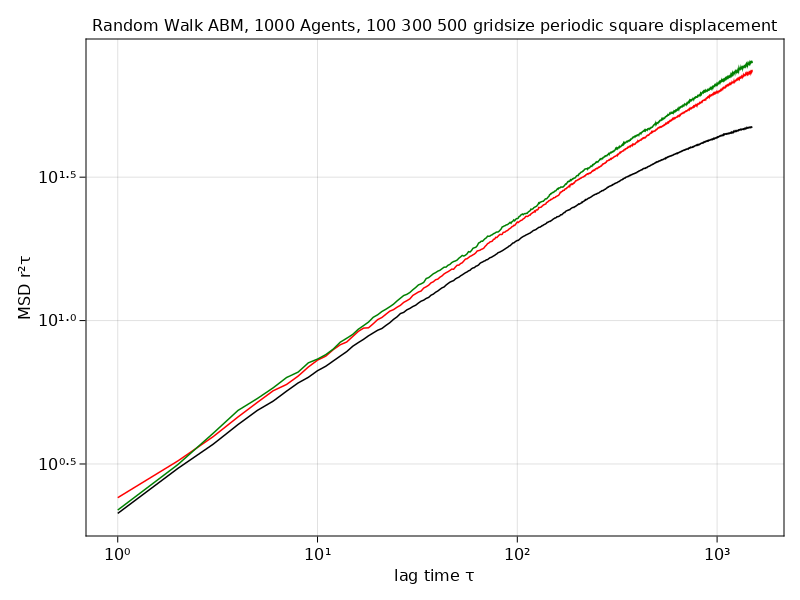

In [12]:
f_mean